In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
%matplotlib inline
import scipy.misc
from PIL import Image
import scipy.io
import os


# Make sure that caffe is on the python path:
caffe_root = '../../'  # this file is expected to be in {caffe_root}/examples/hed/
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

In [20]:
data_root ='../../data/crack/'
with open(data_root+'val.txt') as f:
    test_lst = f.readlines()
test_lst = [data_root+x.split(' ')[0] for x in test_lst]

In [21]:
test_lst

['/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_080850_1281_361.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_080850_1281_721.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_080850_1921_1.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_080850_1921_361.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_080850_1_361.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_080850_641_361.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_080850_641_721.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_115224_1281_1.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_115224_1281_1081.jpg',
 '/media/fan/dv2/backup/fan_part1/fan/data/data1extra/crack/valcrop/20160222_115224_1281_361.jpg',
 '/media/fan/dv2/b

In [23]:
im_lst = []
for i in range(0, len(test_lst)):
    im = Image.open(test_lst[i])
    in_ = np.array(im, dtype=np.float32)
    in_ = in_[:,:,::-1]
    #in_ -= np.array((104.00698793,116.66876762,122.67891434))
    in_ -= np.array((127.00699,126.66877,126.67892))
    im_lst.append(in_)

In [24]:
im_lst

[array([[[ -77.00699,  -76.66877,  -60.67892],
         [ -75.00699,  -74.66877,  -58.67892],
         [ -80.00699,  -79.66877,  -65.67892],
         ...,
         [  36.99301,   30.33123,   51.32108],
         [  24.99301,   18.33123,   39.32108],
         [   1.99301,   -6.66877,   14.32108]],
 
        [[ -82.00699,  -81.66877,  -65.67892],
         [ -87.00699,  -86.66877,  -70.67892],
         [ -96.00699,  -95.66877,  -81.67892],
         ...,
         [ -64.00699,  -68.66877,  -47.67892],
         [ -70.00699,  -74.66877,  -53.67892],
         [ -69.00699,  -75.66877,  -54.67892]],
 
        [[ -83.00699,  -82.66877,  -66.67892],
         [ -91.00699,  -90.66877,  -74.67892],
         [-103.00699, -102.66877,  -88.67892],
         ...,
         [-103.00699, -103.66877,  -83.67892],
         [-101.00699, -102.66877,  -82.67892],
         [ -89.00699,  -90.66877,  -70.67892]],
 
        ...,
 
        [[  -6.00699,  -14.66877,   11.32108],
         [   5.99301,   -2.66877,   23.32

In [25]:
#Visualization
def plot_single_scale(scale_lst, size):
    pylab.rcParams['figure.figsize'] = size, size/2
    
    plt.figure()
    for i in range(0, len(scale_lst)):
        s=plt.subplot(1,5,i+1)
        plt.imshow(1-scale_lst[i], cmap = cm.Greys_r)
        s.set_xticklabels([])
        s.set_yticklabels([])
        s.yaxis.set_ticks_position('none')
        s.xaxis.set_ticks_position('none')
    plt.tight_layout()

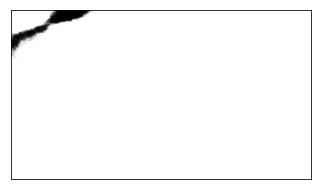

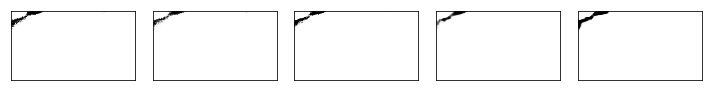

In [27]:
idx = 1

in_ = im_lst[idx]
in_ = in_.transpose((2,0,1))
#remove the following two lines if testing with cpu
caffe.set_mode_gpu()
caffe.set_device(0)
# load net
model_root = './'
net = caffe.Net(model_root+'test_fphb_crack.prototxt', model_root+'fphb_crack.caffemodel', caffe.TEST)
# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_
# run net and take argmax for prediction
net.forward()
out1 = net.blobs['sigmoid-dsn1'].data[0][0,:,:]
out2 = net.blobs['sigmoid-dsn2'].data[0][0,:,:]
out3 = net.blobs['sigmoid-dsn3'].data[0][0,:,:]
out4 = net.blobs['sigmoid-dsn4'].data[0][0,:,:]
out5 = net.blobs['sigmoid-dsn5'].data[0][0,:,:]
fuse = net.blobs['sigmoid-fuse'].data[0][0,:,:]

scale_lst = [fuse]
plot_single_scale(scale_lst, 22)
scale_lst = [out1, out2, out3, out4, out5]
plot_single_scale(scale_lst, 10)